In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data.csv',encoding = "ISO-8859-1",dtype={'CustomerID':np.object})
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


In [3]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB
None
(541909, 8)


In [4]:
#缺失值处理
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [5]:
#清理顾客中的缺失值
df=df.dropna(axis=0,how='any',subset=['CustomerID'])#可以通过subset参数来删除在特定行中中含有空数据的全部行
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null object
Country        406829 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [6]:
#需要将InvoiceDate的类型转换为时间格式：
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')
#找出异常值
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [7]:
#购买数量中存在负值，查询数量少于0的订单
#df[df['Quantity']<0]
df.loc[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom


In [8]:
#订单都是以C开头，为退货订单，
#3. 对购买数量、商品单价中的离群值采用进行处理（基于箱线图）
#求出Quantity的25%和75%分位数
quan_q1=df['Quantity'].quantile(0.25)
quan_q3=df['Quantity'].quantile(0.75)
quan_iqr=quan_q3-quan_q1
#求出UnitPrice的25%和75%分位数
up_q1=df['UnitPrice'].quantile(0.25)
up_q3=df['UnitPrice'].quantile(0.75)
up_iqr=up_q3-up_q1
df=df[(df['Quantity']>(quan_q1-1.5*quan_iqr))&(df['Quantity']<(quan_q3+1.5*quan_iqr))]
df=df[(df['UnitPrice']>(up_q1-1.5*up_iqr))&(df['UnitPrice']<(up_q3+1.5*up_iqr))]
df.describe()

,Quantity,UnitPrice
count,343712.000000,343712.000000
mean,7.286964,2.191766
std,6.878460,1.533390
min,-12.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.650000
75%,12.000000,2.950000
max,26.000000,7.460000


In [9]:
#逻辑性整理
#由于后续需要用到购买日期、购买月份、总金额进行分析，分别计算出这些值
df['Date']=df.InvoiceDate.dt.date
df['Month']=df.Date.values.astype('datetime64[M]')#将日期转换为月份
df['Amount']=df['Quantity']*df['UnitPrice']
#数量和总金额中仍然后小于或等于0的数，新建一个对象，提取这两个字段均大于0的数值
df_order=df[(df['Quantity']>0)&(df['Amount']>0)]
df_order.describe()

,Quantity,UnitPrice,Amount
count,337527.000000,337527.000000,337527.000000
mean,7.482604,2.182949,12.754708
std,6.769440,1.530358,13.143836
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,3.750000
50%,6.000000,1.650000,10.080000
75%,12.000000,2.950000,17.400000
max,26.000000,7.460000,178.800000


In [10]:
#3原数据集中的粒度为购买的产品，将粒度修改为订单（下单时间、顾客ID相同的数据视为同意订单）

df_order = df_order.groupby(['Date','Month','CustomerID','InvoiceNo']).sum().reset_index()
df_order=df_order.drop(['UnitPrice'],axis=1)  #删除列UnitPrice
df_order.describe()

,Quantity,Amount
count,16820.000000,16820.000000
mean,150.153448,255.948769
std,154.504744,253.393595
min,1.000000,0.001000
25%,52.000000,105.032500
50%,109.000000,196.940000
75%,201.000000,326.052500
max,2515.000000,4721.740000


In [11]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16820 entries, 0 to 16819
Data columns (total 6 columns):
Date          16820 non-null object
Month         16820 non-null datetime64[ns]
CustomerID    16820 non-null object
InvoiceNo     16820 non-null object
Quantity      16820 non-null int64
Amount        16820 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 788.5+ KB


In [12]:
#整体数据分析
#为了显示更直观，关闭科学计数法
pd.set_option('display.float_format',lambda x :"%.5f" %x)
df_order.describe()

,Quantity,Amount
count,16820.00000,16820.00000
mean,150.15345,255.94877
std,154.50474,253.39359
min,1.00000,0.00100
25%,52.00000,105.03250
50%,109.00000,196.94000
75%,201.00000,326.05250
max,2515.00000,4721.74000


平均每位顾客购买150个商品，标准差为154，波动性较大，中位数在109，75分位数在201个，而最大值为2515，说明绝大多数商品的购买数量在200个以内，而购买总额的情况和购买数量类似，大部分集中在相对来说小额订单

#消费趋势分析
按照月作为维度，新建对象，计算每月的购买人数CustomerNumber，订单数InvoiceNumber，销量Quantity，销售额Amount

In [13]:
df_order_month=df_order.groupby('Month').agg({'CustomerID':'nunique','InvoiceNo':'count','Quantity':'sum','Amount':'sum'}).reset_index() \
        .rename(columns={'CustomerID':'CustomerNumber','InvoiceNo':'InvoiceNumber'})
df_order_month

,Month,CustomerNumber,InvoiceNumber,Quantity,Amount
0,2010-12-01,833,1270,151041,285922.51000
1,2011-01-01,701,904,136196,233582.36000
2,2011-02-01,703,895,127465,220022.76000
3,2011-03-01,919,1198,170166,286204.84000
4,2011-04-01,805,1034,146977,242647.86100
5,2011-05-01,1001,1388,185214,324323.71000
6,2011-06-01,939,1267,172345,289946.81000
7,2011-07-01,902,1213,180350,288700.39100
8,2011-08-01,878,1150,187823,305047.43000
9,2011-09-01,1194,1596,282713,479858.24200


In [14]:
df_order_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
Month             13 non-null datetime64[ns]
CustomerNumber    13 non-null int64
InvoiceNumber     13 non-null int64
Quantity          13 non-null int64
Amount            13 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 600.0 bytes


d:\Users\whb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


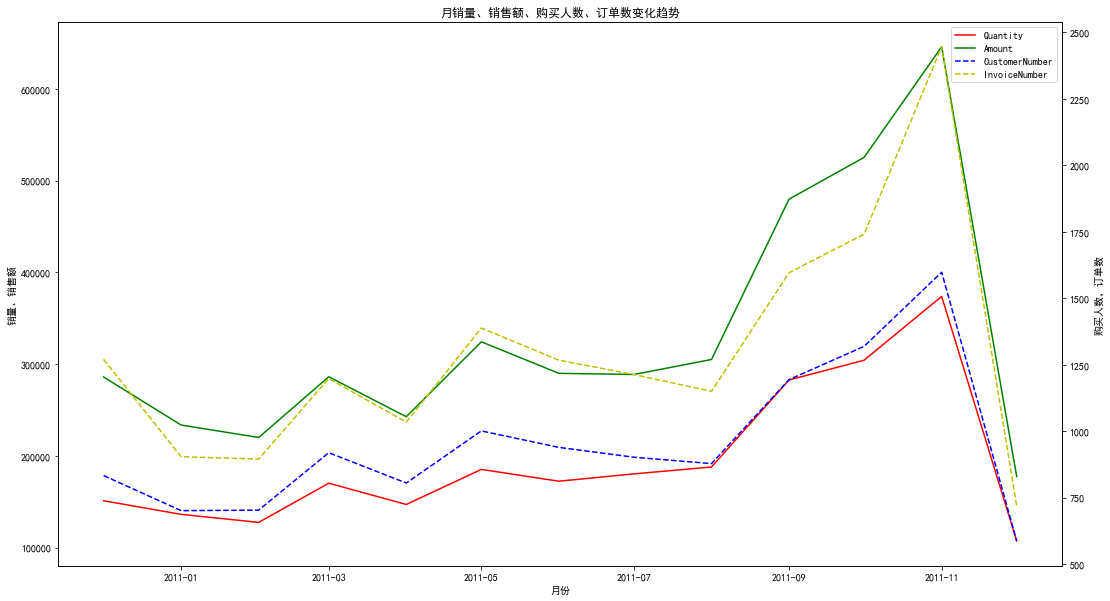

In [15]:
#绘制图表，显示月销量、销售额、购买人数、订单数的变化趋势
fig,ax1=plt.subplots(figsize=(18,10))
#制作一个兄弟轴
ax2=ax1.twinx()##制作一个兄弟轴
#ax1:ax1:y轴为销量、销售额；ax2：y轴为购买人数，订单数
l1,=ax1.plot(df_order_month['Month'],df_order_month['Quantity'],'r-')
l2,=ax1.plot(df_order_month['Month'], df_order_month['Amount'], 'g-')
l3,=ax2.plot(df_order_month['Month'], df_order_month['CustomerNumber'], 'b--')
l4,=ax2.plot(df_order_month['Month'], df_order_month['InvoiceNumber'], 'y--')
#设置坐标标签
ax1.set_ylabel('销量、销售额')
ax2.set_ylabel('购买人数，订单数')
ax1.set_xlabel('月份')
#设置统计图标题
plt.title('月销量、销售额、购买人数、订单数变化趋势')
#设置图例
plt.legend(handles=[l1, l2, l3, l4])

销量、销售额、购买人数、订单数的变化趋势基本趋致，随着时间，数据开始涨高，而在11月时达到峰值，假设1：数据异常，2：由于促销活动。但是由于手头上仅有销售数据，无法进行判断。

In [16]:
#复购率、回购率
#先将用户的消费数据进行数据透视，新建透视表以统计每个用户每月的订单量
pivoted_counts=df_order.pivot_table(index='CustomerID',columns='Month',values='InvoiceNo',aggfunc='count').fillna(0)
columns_month=df_order.Month.sort_values().astype('str').unique()
pivoted_counts.columns=columns_month
pivoted_counts

,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12347,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000
12348,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12349,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
12350,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12352,0.00000,0.00000,1.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000
12353,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12354,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12355,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12356,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [17]:
#. 计算复购率
#复购率：在某个时间窗口上，产生两个及以上订单的用户在所有消费用户中的占比。
#将数据转换一下，消费两次及以上记为1，消费一次记为0，没有消费记为NaN：
pivoted_counts_transf=pivoted_counts.applymap(lambda x :1 if x>1 else np.NaN if x==0 else 0 )
pivoted_counts_transf.head()

,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12347,0.00000,0.00000,nan,nan,0.00000,nan,0.00000,nan,0.00000,nan,0.00000,nan,0.00000
12348,0.00000,0.00000,nan,nan,0.00000,nan,nan,nan,nan,nan,nan,nan,nan
12349,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00000,nan
12350,nan,nan,0.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
12352,nan,nan,0.00000,1.00000,nan,nan,nan,nan,nan,1.00000,nan,0.00000,nan


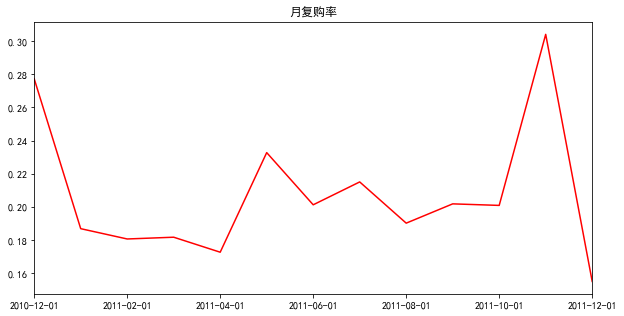

In [44]:
#用sum计算复购人数，用count计算总消费人数，用sum得出的数据除以count的，绘制折线图：
df_order_fugou=(pivoted_counts_transf.sum()/pivoted_counts_transf.count())#.apply(lambda x :format(x,'.2%'))
df_order_fugou.plot(figsize=(10,5),color='r',title='月复购率')


复购率有两个峰值，一个是2010年的12月，达到28%，另一个是2011年的11月，达到30%，都是一年的年尾时段，而在2011年1月至2011年10月这段时间内。数据跟每月分析的数据基本吻合，可以排除数据异常的情况，波动是和营销活动有较大的关系。

回购率：在某两个连续的时间窗口均有消费记录的用户在前一个时间窗口中所有消费用户数的占比。，下面开始分析回购情况

In [19]:
#对pivoted_counts数据透视表进行处理，回购行为记为1，消费非回购行为记为0，无消费记为NaN：
def repurchaseRate(data):
    status = []
    for i in range(12):
        if data[i] >= 1:
            if data[i+1] >= 1:
                status.append(1)         
            if data[i+1] == 0:
                status.append(0)           
        else:
            status.append(np.NaN)         
    status.append(np.NaN)
    return pd.Series(status, index=columns_month)
pivoted_repurchase = pivoted_counts.apply(repurchaseRate, axis=1)
pivoted_repurchase.head()

,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12347,1.00000,0.00000,nan,nan,0.00000,nan,0.00000,nan,0.00000,nan,0.00000,nan,nan
12348,1.00000,0.00000,nan,nan,0.00000,nan,nan,nan,nan,nan,nan,nan,nan
12349,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00000,nan
12350,nan,nan,0.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
12352,nan,nan,1.00000,0.00000,nan,nan,nan,nan,nan,0.00000,nan,0.00000,nan


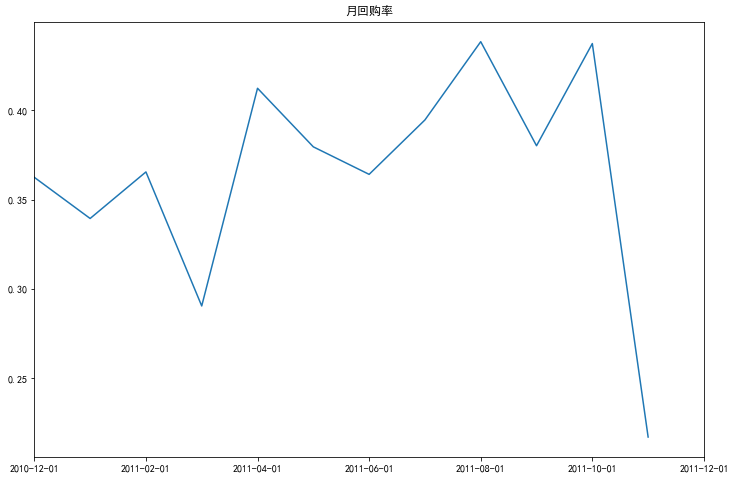

In [20]:
(pivoted_repurchase.sum()/pivoted_repurchase.count()).plot(figsize=(12,8),title='月回购率')

在2010年12 月至2011年的10月，回购率大部分处于35%以上，结合月销售额统计可以看出，回购率月销量、销售额的关系非常明显，比如8，10月达到回购率的峰值，那么9 11 月份的销量，销售额出现大幅增长，可以看出做好老客户的维护非常重要。

用户分层
按照用户的消费行为对用户进行分层，分别是：新用户、活跃用户、不活跃用户、回流用户。

新用户的定义是第一次消费，活跃用户是连续两个时间窗口有消费记录的用户，不活跃用户是当前时间窗口内没有消费记录的老用户。回流用户是在在当前时间窗口内有过消费过的不活跃用户，流失用户是连续两个及以上时间窗口没有消费记录的用户；以上的时间窗口都是按月统计。



In [21]:
#unreg为不是新消用户，new为新用户，unactive为不活跃用户，active为活跃用户，lost为流失用户，return为回流用户
def purchase_status(data):
    status=[]
    for i in range(13):
        #若本月没有消费：
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':#若在上一个时间窗口定义为不是新消，此时间窗口定义为不是新消
                    status.append('unreg') 
                elif status[i-1]=='unactive':
                    status.append('lost')#若在上一个时间窗口定义为不活跃用户，此时间窗口定义为流失用户
                elif status[i-1]=='lost':
                    status.append('lost')#若在上一个时间窗口定义为流失用户，此时间窗口定义为流失用户
                else:
                    status.append('unactive') #若在上一个时间窗口定义为活跃用户/回流用户/新用户，此时间窗口定义为不活跃用户
            else:
                status.append('unreg')
        #若本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unactive' or status[i-1]=='lost':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status, index=columns_month)
pivoted_purchase_status = pivoted_counts.apply(purchase_status, axis = 1)
pivoted_purchase_status

,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12347,new,active,unactive,lost,return,unactive,return,unactive,return,unactive,return,unactive,return
12348,new,active,unactive,lost,return,unactive,lost,lost,lost,lost,lost,lost,lost
12349,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive
12350,unreg,unreg,new,unactive,lost,lost,lost,lost,lost,lost,lost,lost,lost
12352,unreg,unreg,new,active,unactive,lost,lost,lost,lost,return,unactive,return,unactive
12353,unreg,unreg,unreg,unreg,unreg,new,unactive,lost,lost,lost,lost,lost,lost
12354,unreg,unreg,unreg,unreg,new,unactive,lost,lost,lost,lost,lost,lost,lost
12355,unreg,unreg,unreg,unreg,unreg,new,unactive,lost,lost,lost,lost,lost,lost
12356,unreg,new,unactive,lost,return,unactive,lost,lost,lost,lost,lost,lost,lost


In [22]:
#将不是新消用户排除，统计不同分层每月的用户量
purchase_status_counts=pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_counts

,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
active,nan,302.00000,238,257,267,332,380,342,356,385,454,577,347
lost,nan,nan,425,668,864,1124,1269,1523,1764,1792,1776,1812,2352
new,833.00000,399.00000,359,442,288,277,231,193,166,291,356,317,38
return,nan,nan,106,220,250,392,328,367,356,518,509,704,202
unactive,nan,531.00000,463,446,652,473,621,597,546,493,740,742,1251


In [23]:
purchase_status_counts.fillna(0).T

,active,lost,new,return,unactive
2010-12-01,0.00000,0.00000,833.00000,0.00000,0.00000
2011-01-01,302.00000,0.00000,399.00000,0.00000,531.00000
2011-02-01,238.00000,425.00000,359.00000,106.00000,463.00000
2011-03-01,257.00000,668.00000,442.00000,220.00000,446.00000
2011-04-01,267.00000,864.00000,288.00000,250.00000,652.00000
2011-05-01,332.00000,1124.00000,277.00000,392.00000,473.00000
2011-06-01,380.00000,1269.00000,231.00000,328.00000,621.00000
2011-07-01,342.00000,1523.00000,193.00000,367.00000,597.00000
2011-08-01,356.00000,1764.00000,166.00000,356.00000,546.00000
2011-09-01,385.00000,1792.00000,291.00000,518.00000,493.00000


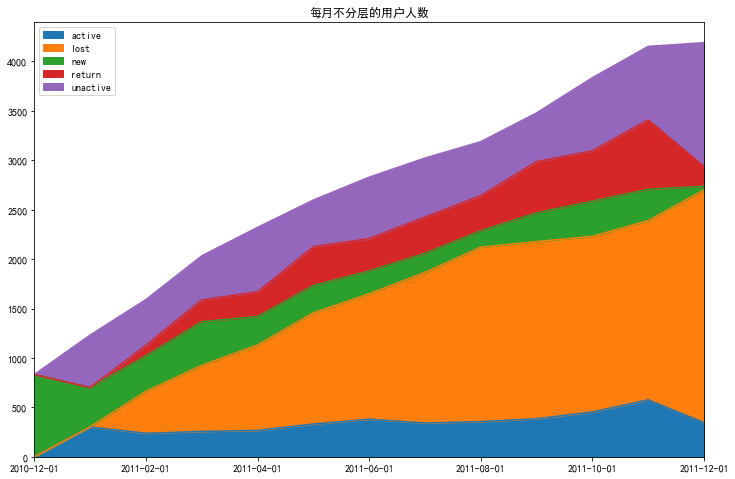

In [24]:
purchase_status_counts.fillna(0).T.plot.area(title='每月不分层的用户人数',figsize=(12,8))

绿色和黄色区域可以不看，由于绿色是新用户的数量，数据源只是某时间段的消费行为，而流失用户会进行累加导致数据有误差。可以看出，活跃用户和回流用户数比较稳定且在缓慢增长，观察这两个数据的增长情况

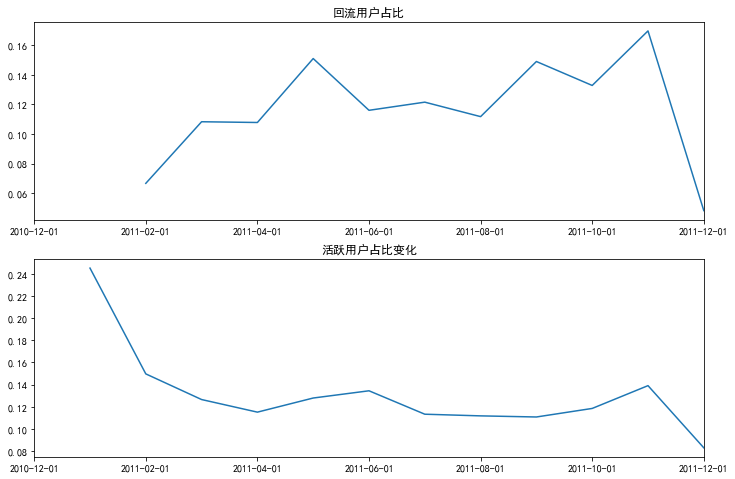

In [25]:
fcpurchase_rate=purchase_status_counts/purchase_status_counts.sum()

plt.subplot(211)
fcpurchase_rate.loc['return'].plot(title='回流用户占比',figsize=(12,8))
plt.subplot(212)
fcpurchase_rate.loc['active'].plot(title='活跃用户占比变化',figsize=(12,8))

2011截止11月年期间，回流率占比在上升，活跃率在此期间保持稳定，但是12月份，两者都陡然回落

In [26]:
user_purchase = df_order[['CustomerID', 'Quantity', 'Date','Amount']]
order_date_min = user_purchase.groupby('CustomerID').Date.min()
order_date_max=user_purchase.groupby('CustomerID').Date.max()
(order_date_max-order_date_min).head()

CustomerID
12347   365 days
12348   110 days
12349     0 days
12350     0 days
12352   260 days
Name: Date, dtype: timedelta64[ns]

In [27]:
#查看生命周期详细数据
(order_date_max - order_date_min).describe()

count                        4190
mean     128 days 21:27:03.866348
std      131 days 13:54:37.445430
min               0 days 00:00:00
25%               0 days 00:00:00
50%              90 days 00:00:00
75%             250 days 00:00:00
max             373 days 00:00:00
Name: Date, dtype: object

平均生命周期为128天，方差为131天，数据离散程度大，大部分为一次性消费用户，下面将这部分用户筛选过后在进行分析，

In [28]:
life_time = (order_date_max - order_date_min).reset_index()
life_time=life_time.set_index('CustomerID').applymap(lambda x:x.days)#timedelta64[ns]可通过days属性获得天数数值
life_time[life_time.Date>0].describe()

,Date
count,2656.00000
mean,203.33773
std,110.33316
min,1.00000
25%,107.00000
50%,210.00000
75%,301.00000
max,373.00000


消费一次以上的平均用户生命周期是203天。从策略看，用户首次消费后应该花费更多的引导其进行多次消费，提供生命周期，这会带来2倍的增量。

In [29]:
#看看留存率的表现
#留存率指用户在第一次消费后，有多少比率进行第二次消费。和回流率的区别是留存倾向于计算第一次消费，并且有多个时间窗口。

In [30]:
#计算用户每次消费与首次消费的时间差
user_purchase_retention=pd.merge(left=user_purchase, right=order_date_min.reset_index(), how='inner',on='CustomerID', suffixes=('','_min'))
user_purchase_retention['Date_diff']=user_purchase_retention['Date']-user_purchase_retention['Date_min']

date_transfer=lambda x: x/ np.timedelta64(1,'D')#也可以使用days属性
user_purchase_retention['Date_diff']=user_purchase_retention['Date_diff'].apply(date_transfer)
user_purchase_retention

,CustomerID,Quantity,Date,Amount,Date_min,Date_diff
0,12431,95,2010-12-01,256.25000,2010-12-01,0.00000
1,12431,92,2010-12-17,236.40000,2010-12-01,16.00000
2,12431,94,2011-01-28,249.78000,2010-12-01,58.00000
3,12431,268,2011-02-17,506.40000,2010-12-01,78.00000
4,12431,73,2011-02-27,203.75000,2010-12-01,88.00000
5,12431,168,2011-05-12,347.96000,2010-12-01,162.00000
6,12431,105,2011-05-23,260.39000,2010-12-01,173.00000
7,12431,162,2011-07-19,387.62000,2010-12-01,230.00000
8,12431,178,2011-07-24,467.30000,2010-12-01,235.00000
9,12431,86,2011-08-12,191.16000,2010-12-01,254.00000


In [31]:
##将时间分为0～3天内，3～7天内，7～15天等
bin=[0,3,7,15,30,60,90,180,373]
user_purchase_retention['Date_diff_bin']=pd.cut(user_purchase_retention['Date_diff'],bins=bin)
#用pivot_table数据透视，获得的结果是用户在第一次消费之后，在后续各时间段内的消费总额。
user_purchase_retention['Date_diff_bin']=user_purchase_retention['Date_diff_bin'].astype(object)
pivoted_retention_amount=user_purchase_retention.pivot_table(index='CustomerID',columns='Date_diff_bin',values='Amount',aggfunc=np.sum)
pivoted_retention_amount.head()

Date_diff_bin,"(0.0, 3.0]","(3.0, 7.0]","(7.0, 15.0]","(15.0, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 180.0]","(180.0, 373.0]"
CustomerID,,,,,,,,
12347,nan,nan,nan,nan,437.14000,nan,325.00000,1901.70000
12348,nan,nan,nan,nan,20.40000,nan,17.00000,nan
12352,nan,nan,70.35000,120.33000,120.33000,nan,nan,591.53000
12356,nan,nan,nan,nan,nan,267.86000,nan,nan
12358,nan,nan,nan,nan,nan,nan,509.16000,nan


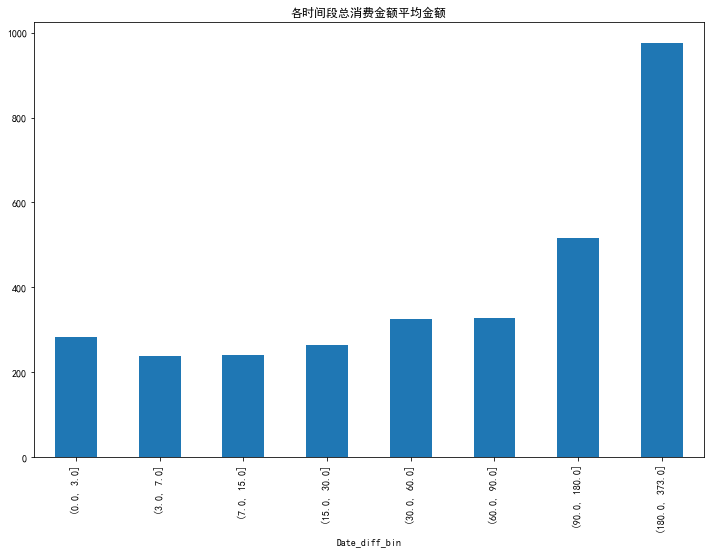

In [32]:
pivoted_retention_amount.mean().plot(kind='bar',figsize=(12,8),title='各时间段总消费金额平均金额')

从4天后，消费金额随着时间增长，下面结合消费用户数量一起分析：

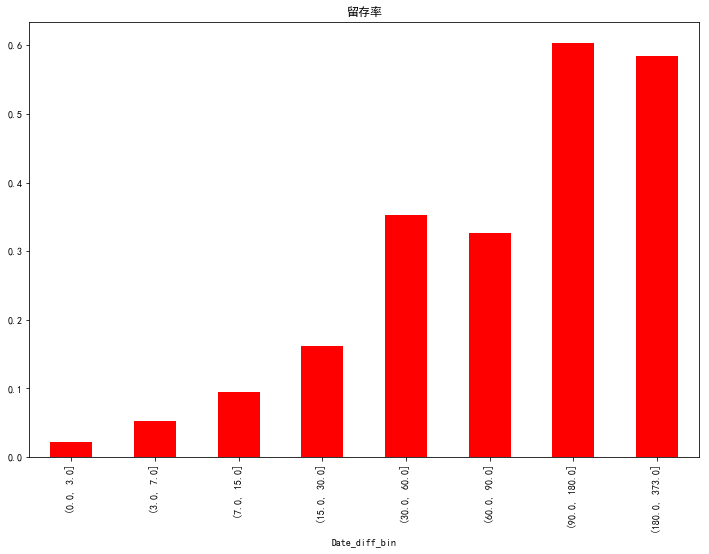

In [33]:
pivoted_retention_count=pivoted_retention_amount.fillna(0).applymap(lambda x: 1 if x>0 else 0)
(pivoted_retention_count.sum()/pivoted_retention_count.count()).plot(kind='bar',figsize=(12,8),color='r',title='留存率')


    前期留存率较低，30天内的留存率表现较差，均不超过20%，峰值在90-180内范围，达到60%，结合60%，结合消费金额看，在平台建立忠诚度后，消费的金额与15天内的相比，增加2-4倍，建议做好不同时期的用户运营，放长线钓大鱼，。下面分析用户购买间隔时间，给出运营时间点的建议。

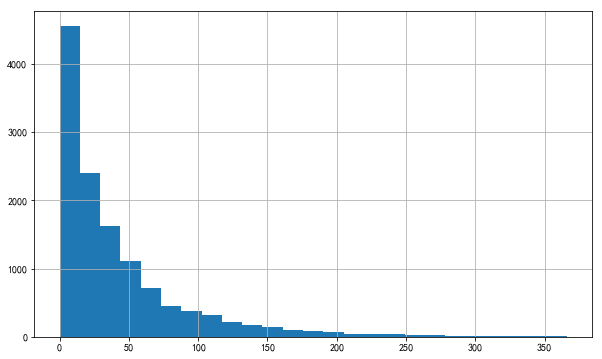

In [34]:
def diff1(group):
    d=group.Date_diff-group.Date_diff.shift(1)
    return d 
last_diff=user_purchase_retention.groupby('CustomerID').apply(diff1)#groupby不一定要聚合
last_diff.hist(figsize=(10,6),bins=25)

直方图符合典型的长尾分布，大部分用户的消费间隔确实比较短。最好的运营策略的时间点在消费后的30天内，

In [35]:
#RFM模型构建

In [36]:
df_order.head()

,Date,Month,CustomerID,InvoiceNo,Quantity,Amount
0,2010-12-01,2010-12-01,12431,536389,95,256.25000
1,2010-12-01,2010-12-01,12433,536532,1020,1289.32000
2,2010-12-01,2010-12-01,12583,536370,362,737.66000
3,2010-12-01,2010-12-01,12662,536527,156,243.48000
4,2010-12-01,2010-12-01,12748,536521,1,4.95000


In [37]:
from datetime import date
now=date(2011,12,31) #选择时间，数据集种包含的日期的最后一天
#按照顾客ID分类，统计计算消费次数、消费总金额以及最近一次交易
rfm=df_order.groupby('CustomerID').agg({'Date':lambda x: (now-x.max()).days,
                                       "InvoiceNo":lambda x: len(x),
                                       'Amount':lambda x: x.mean()})
rfm=rfm.rename(columns={'Date':'Recency','InvoiceNo': 'Frequency','Amount': 'Monetary'})#这里生成新的datefrme了，可以使咏inplace参数
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,24,7,473.53286
12348,270,3,30.06667
12349,40,1,984.15000
12350,332,1,294.40000
12352,58,7,161.56286


In [38]:
quantiles=rfm.quantile(q=[0.5])
#用0和1划分R、F、M三列数据
rfmsegmentation = rfm 
rfmsegmentation['R_Quantile']=rfmsegmentation['Recency'].map(lambda x:1 if x<=quantiles['Recency'][0.5] else 0  )
rfmsegmentation['F_Quantile']=rfmsegmentation['Frequency'].map(lambda x : 1 if x>quantiles['Frequency'][0.5] else 0 )
rfmsegmentation['M_Quantile'] = rfmsegmentation['Monetary'].map(lambda x:1 if x>quantiles['Monetary'][0.5] else 0)
#合并RFM
rfmsegmentation['RFM']=rfmsegmentation['R_Quantile'].map(str)+rfmsegmentation['F_Quantile'].map(str)+rfmsegmentation.M_Quantile.map(str)
#划分等级
def rfmclass(data):
    if data=='111':
        return '重要价值客户'
    elif data=='011':
        return '重要唤回客户'
    elif data=='101':
        return '重要深耕客户'
    elif data=='001':
        return '重要挽留客户'
    elif data=='110':
        return '潜力客户'
    elif data=='100':
        return '新客户'
    elif data=='010':
        return '一般维持客户'
    else:
        return '流失客户'
rfmsegmentation['RFMclass']=rfmsegmentation['RFM'].apply(rfmclass)
rfmsegmentation.head()

,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM,RFMclass
CustomerID,,,,,,,,
12347,24,7,473.53286,1,1,1,111,重要价值客户
12348,270,3,30.06667,0,1,0,010,一般维持客户
12349,40,1,984.15000,1,0,1,101,重要深耕客户
12350,332,1,294.40000,0,0,1,001,重要挽留客户
12352,58,7,161.56286,1,1,0,110,潜力客户


In [39]:
quantiles['Recency'][0.5]

72.0

  每月的消费总金额、销量等都是随着时间不短上涨，在9-11月这段时间上涨的幅度最大，具体的因素可以考察近期的渠道以及营销活动。
提高用户生命周期，，用户首次消费后应该花费更多的引导其进行多次消费，这会带来2倍的增量。
用户的个体消费行为就有一定的规律性，在用户平台建立忠诚度后，消费的金额与15天内的相比，增加2-4倍。最好的运营策略的时间点在消费后的30天内，其中如果在客户消费的10天内，会进行回购的占比最高。